In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
d0 = pd.read_csv('./../Data/census/2021/OA_number_of_residents.csv'
                 ).drop(columns={'geography','date','Residence type: Lives in a communal establishment; measures: Value'}
                        ).rename(columns={'geography code':'OA21CD', 'Residence type: Lives in a household; measures: Value':'N_residents_no_community','Residence type: Total; measures: Value':'Total_N_residents'})
d0

,OA21CD,Total_N_residents,N_residents_no_community
0,E00060274,273,273
1,E00060275,416,416
2,E00060276,259,259
3,E00060277,278,278
4,E00060279,276,276
...,...,...,...
188875,W00006938,219,219
188876,W00006940,422,422
188877,W00006941,274,274
188878,W00006942,327,327


In [4]:
d1 = pd.read_csv('./../Data/census/2021/OA_number_of_dwellings.csv').rename(columns={'Observation':'N_dwellings','Output Areas Code':'OA21CD'}).drop(columns='Output Areas')
d2 = pd.read_csv('./../Data/census/2021/OA_N_households_21.csv').rename(columns={'Observation':'N_households','Output Areas Code':'OA21CD'}).drop(columns='Output Areas')
d2

,OA21CD,N_households
0,E00000001,94
1,E00000003,109
2,E00000005,63
3,E00000007,86
4,E00000010,126
...,...,...
188875,W00010693,57
188876,W00010694,158
188877,W00010695,75
188878,W00010696,96


In [42]:
d3 = pd.read_csv('./../Data/census/2021/OA_number_of_household_occupants.csv'
                 ).rename(columns={'Observation':'N_household_occupants', 'Household size (9 categories) Code':'Household_size','Output Areas Code':'OA21CD'}
                          ).drop(columns={'Household size (9 categories)','Output Areas'}
                                 ).pivot(index= 'OA21CD',columns='Household_size', values='N_household_occupants'
                                         ).reset_index()

d3['H_1-2_p'] = d3[1] + d3[2]
d3['H_3-4_p'] = d3[3] + d3[4]
d3['H_5-7_p'] = d3[5] + d3[6] + d3[7]
d3['N_of_people'] = (d3[1]*1) + (d3[2]*2) + (d3[3]*3) + (d3[4]*4) + (d3[5]*5) + (d3[6]*6) + (d3[7]*7) +(d3[8]*8)
d3= d3.drop(columns={0,1,2,3,4,5,6,7}).rename(columns={8:'H_8-more_p'}).loc[:,['OA21CD','H_1-2_p','H_3-4_p','H_5-7_p','H_8-more_p','N_of_people']]
    
d3

Household_size,OA21CD,H_1-2_p,H_3-4_p,H_5-7_p,H_8-more_p,N_of_people
0,E00000001,78,16,0,0,176
1,E00000003,69,36,4,0,256
2,E00000005,53,10,0,0,112
3,E00000007,82,4,1,0,145
4,E00000010,115,7,3,0,173
...,...,...,...,...,...,...
188875,W00010693,52,6,0,0,78
188876,W00010694,92,51,16,0,404
188877,W00010695,41,27,6,0,189
188878,W00010696,56,38,3,0,237


In [22]:
d4 = pd.read_csv('./../Data/census/2021/OA_Number_of_dependent_children.csv'
                 ).rename(columns={'Observation':'N_households','Output Areas Code':'OA21CD'}
                          ).drop(columns={'Output Areas','Ethnic group of the Household Reference Person (8 categories) Code','Ethnic group of the Household Reference Person (8 categories)',
                                          'Dependent child age (6 categories)'}
                                ).groupby(['OA21CD',	'Dependent child age (6 categories) Code']
                                           ).sum().reset_index(
    
                                           ).pivot(index= 'OA21CD',columns='Dependent child age (6 categories) Code', values='N_households').reset_index()


d4['CHILDREN_1_2'] = d4[1]+d4[2]
d4['CHILDREN_3_4'] = d4[3]+d4[4]
d4['CHILDREN_5_more'] = d4[5]

#d4 = d4.loc[:,['OA21CD','CHILDREN_1_2','CHILDREN_3_4','CHILDREN_5_more']]
d4 = d4.rename(columns={-8:'-8_not_applicable', 1:'One child household',2:'Two child household',3:'Three child household',4:'Four child household', 5:'Five or more child household'})
d4

Dependent child age (6 categories) Code,OA21CD,-8_not_applicable,One child household,Two child household,Three child household,Four child household,Five or more child household,CHILDREN_1_2,CHILDREN_3_4,CHILDREN_5_more
0,E00000001,0,0,1,11,2,2,1,13,2
1,E00000003,0,4,6,18,8,4,10,26,4
2,E00000005,0,2,4,2,0,2,6,2,2
3,E00000007,0,1,0,4,1,0,1,5,0
4,E00000010,0,1,0,3,3,1,1,6,1
...,...,...,...,...,...,...,...,...,...,...
188875,W00010693,0,0,0,1,0,0,0,1,0
188876,W00010694,0,17,13,48,25,9,30,73,9
188877,W00010695,0,8,7,19,8,3,15,27,3
188878,W00010696,0,26,10,16,2,1,36,18,1


d5 = pd.read_csv('./../Data/census/2021/OA_hours_worked.csv'
                 ).rename(columns={'Observation':'N_poeple_hours','Output Areas Code':'OA21CD'}
                          ).drop(columns={'Output Areas','Hours worked (5 categories) Code'}
                                 ).pivot(index= 'OA21CD',columns='Hours worked (5 categories)', values='N_poeple_hours').reset_index()
d5['Part_time_15-30h'] = d5['Part-time: 15 hours or less worked'] + d5['Part-time: 16 to 30 hours worked']
d5['Full_time_31_moreh'] = d5['Full-time: 31 to 48 hours worked'] + d5['Full-time: 49 or more hours worked']
d5['Hours_worked_other'] = d5['Does not apply']

d5 = d5.loc[:,['OA21CD','Part_time_15-30h','Full_time_31_moreh','Hours_worked_other']]
d5

d6 = pd.read_csv('./../Data/census/2021/OA_Occupation.csv'
                 ).rename(columns={'Output Areas Code':'OA21CD'}
                    ).drop(columns = {'Output Areas','Occupation (current) (10 categories) Code'}
                        ).pivot(index= 'OA21CD',columns='Occupation (current) (10 categories)', values='Observation'
                                ).reset_index()
d6.rename(columns={'Does not apply':'10.Occupation_unspecified'})

d6

d7 = pd.read_csv('./../Data/census/2021/OA_Population_density.csv'
                 ).rename(columns={'Output Areas Code':'OA21CD','Observation':'popul_dens'}
                          ).drop(columns={'Output Areas'})
d7

d8 = pd.read_csv('./../Data/census/2021/OA_car_availability.csv'
                 ).drop(columns={'Household composition (8 categories) Code','Household composition (8 categories)','Output Areas','Car or van availability (3 categories) Code'}
                    ).rename(columns={'Output Areas Code':'OA21CD'}
                        ).groupby(['OA21CD','Car or van availability (3 categories)']
                            ).sum().reset_index(
                            ).pivot(index= 'OA21CD',columns='Car or van availability (3 categories)', values='Observation'
                                ).reset_index(
                                ).drop(columns={'Does not apply'}
                                                     ).rename(columns={'1 or more cars or vans in household':'N_H_car_1_more', 'No cars or vans in household':'N_H_no_car'})
d8

d9 = pd.read_csv('./../Data/census/2021/OA_economic_activity_status.csv'
                 ).drop(columns={'Output Areas','Economic activity status (20 categories) Code'}
                        ).rename(columns={'Output Areas Code':'OA21CD'}
                                ).pivot(index= 'OA21CD',columns='Economic activity status (20 categories)', values='Observation'
                                ).reset_index()
d9['N_econ_inactive'] = d9['Economically Inactive: Looking after home or family'] + d9['Economically inactive: Long-term sick or disabled'] + d9['Economically inactive: Other'] + d9['Economically inactive: Retired'] + d9['Economically inactive: Student']
d9['N_Unemployed'] = d9['Economically active (excluding full-time students): Unemployed: Seeking work or waiting to start a job already obtained: Available to start working within 2 weeks']
d9['N_students'] = d9['Economically active and a full-time student: In employment: Employee: Full-time'] + d9['Economically active and a full-time student: In employment: Employee: Part-time'] + d9['Economically active and a full-time student: In employment: Self-employed with employees: Full-time'] + d9['Economically active and a full-time student: In employment: Self-employed with employees: Part-time'] + d9['Economically active and a full-time student: In employment: Self-employed without employees: Full-time'] + d9['Economically active and a full-time student: In employment: Self-employed without employees: Part-time'] + d9['Economically active (excluding full-time students): Unemployed: Seeking work or waiting to start a job already obtained: Available to start working within 2 weeks']
d9['N_FT_empl'] = d9['Economically active (excluding full-time students): In employment: Employee: Full-time'] + d9['Economically active (excluding full-time students): In employment: Self-employed with employees: Full-time'] + d9['Economically active (excluding full-time students): In employment: Self-employed without employees: Full-time']
d9['N_PT_empl'] = d9['Economically active (excluding full-time students): In employment: Employee: Part-time'] + d9['Economically active (excluding full-time students): In employment: Self-employed with employees: Part-time'] + d9['Economically active (excluding full-time students): In employment: Self-employed without employees: Part-time']
d9 = d9.loc[:,['OA21CD','N_econ_inactive','N_Unemployed','N_students','N_FT_empl','N_PT_empl']]

d9

d10 = pd.read_csv('./../Data/census/2021/OA_general_health.csv'
                 ).drop(columns={'Output Areas','General health (6 categories) Code'}
                        ).rename(columns={'Output Areas Code':'OA21CD'}
                                ).pivot(index= 'OA21CD',columns='General health (6 categories)', values='Observation'
                                ).reset_index()
d10['HE_Bad_or_Very_bad_health'] = d10['Bad health'] + d10['Very bad health']
d10['HE_Good_or_Very_good_health'] = d10['Good health'] + d10['Very good health']
d10 = d10.loc[:,['OA21CD','HE_Bad_or_Very_bad_health','Fair health','HE_Good_or_Very_good_health']].rename(columns={'Fair health':'HE_Fair health'})
d10

In [23]:
d11 = pd.read_csv('./../Data/census/2021/OA_housholds_by_deprivation.csv'
                 ).drop(columns={'Output Areas','Household deprivation (6 categories) Code'}
                        ).rename(columns={'Output Areas Code':'OA21CD'}
                                ).pivot(index= 'OA21CD',columns='Household deprivation (6 categories)', values='Observation'
                                ).reset_index()
d11['Household is deprived in one dimension2'] = d11['Household is deprived in one dimension'] * 1
d11['Household is deprived in two dimensions2'] = d11['Household is deprived in two dimensions'] * 2
d11['Household is deprived in three dimensions2'] = d11['Household is deprived in three dimensions'] * 3
d11['Household is deprived in four dimensions2'] = d11['Household is deprived in four dimensions'] * 4
d11['D_Household_depriv_points'] = d11['Household is deprived in one dimension2'] + d11['Household is deprived in two dimensions2']+d11['Household is deprived in three dimensions2'] + d11['Household is deprived in four dimensions2']
#d11 = d11.loc[:,['OA21CD','D_Household_depriv_points','Household is not deprived in any dimension']].rename(columns={'Household is not deprived in any dimension':'D_House_NOT_depriv'})
d11.head()

Household deprivation (6 categories),OA21CD,Does not apply,Household is deprived in four dimensions,Household is deprived in one dimension,Household is deprived in three dimensions,Household is deprived in two dimensions,Household is not deprived in any dimension,Household is deprived in one dimension2,Household is deprived in two dimensions2,Household is deprived in three dimensions2,Household is deprived in four dimensions2,D_Household_depriv_points
0,E00000001,0,0,22,0,3,66,22,6,0,0,28
1,E00000003,0,0,30,0,5,74,30,10,0,0,40
2,E00000005,0,0,15,0,2,48,15,4,0,0,19
3,E00000007,0,0,15,1,1,69,15,2,3,0,20
4,E00000010,0,1,56,7,22,40,56,44,21,4,125


d12 = pd.read_csv('./../Data/census/2021/OA_education.csv'
                  ).drop(columns={'geography','date','Highest level of qualification: Total: All usual residents aged 16 years and over'}
                         ).rename(columns={'geography code':'OA21CD'}
                                  )

d12.info()

d13 = pd.read_csv('./../Data/census/2021/OA_age.csv'
                  ).drop(columns={'geography','date'}
                         ).rename(columns={'geography code':'OA21CD'}
                                  )
d13['N_children_under_15'] = d13['Age: Aged 4 years and under'] + d13['Age: Aged 5 to 9 years'] + d13['Age: Aged 10 to 14 years']
d13['N_children_under_19'] = d13['Age: Aged 4 years and under'] + d13['Age: Aged 5 to 9 years'] + d13['Age: Aged 10 to 14 years'] + d13['Age: Aged 15 to 19 years']
d13['N_adults_19_64'] = d13['Age: Aged 20 to 24 years'] + d13['Age: Aged 25 to 29 years'] + d13['Age: Aged 30 to 34 years'] + d13['Age: Aged 35 to 39 years'] + d13['Age: Aged 40 to 44 years'] + d13['Age: Aged 45 to 49 years'] + d13['Age: Aged 50 to 54 years'] + d13['Age: Aged 55 to 59 years'] + d13['Age: Aged 60 to 64 years']
d13['N_young_adults_20_39'] = d13['Age: Aged 20 to 24 years'] + d13['Age: Aged 25 to 29 years'] + d13['Age: Aged 30 to 34 years'] + d13['Age: Aged 35 to 39 years'] + d13['Age: Aged 60 to 64 years']
d13['N_mature_adults_40_64'] =   d13['Age: Aged 40 to 44 years'] + d13['Age: Aged 45 to 49 years'] + d13['Age: Aged 50 to 54 years'] + d13['Age: Aged 55 to 59 years']
d13['N_retirees_65_m'] = d13['Age: Aged 65 to 69 years'] + d13['Age: Aged 70 to 74 years'] + d13['Age: Aged 75 to 79 years'] + d13['Age: Aged 80 to 84 years'] + d13['Age: Aged 85 years and over']
d13 = d13.drop(d13.iloc[:,2:20], axis = 1
               ).rename(columns = {'Age: Total':'Total_N_residents(age)'}
                        )
d13.info()

d14 = pd.read_csv('./../Data/census/2021/OA_arrivalUK.csv'
                  ).drop(columns={'geography','date'}
                         ).rename(columns={'geography code':'OA21CD'}
                                  )
d14['N_immigrants_arrived_after18'] = d14.iloc[:,10:20].sum(axis = 1)
d14 = d14.drop(d14.iloc[:,1:20], axis = 1)
d14.info()

d15 = pd.read_csv('./../Data/census/2021/OA_tenure.csv'
                  ).drop(columns={'geography','date'}
                         ).rename(columns={'geography code':'OA21CD'}
                                  )
d15['N_H_Owned'] = d15.iloc[:,2:7].sum(axis = 1)
d15['N_H_So_Rented'] = d15.iloc[:,7:10].sum(axis = 1)
d15['N_H_Pr_Rented'] = d15.iloc[:,10:14].sum(axis = 1)
d15 = d15.iloc[:,[0,14,15,16]]
d15.info()

d15.iloc[:,2:7]

In [43]:
data = d0.merge(d1, on = 'OA21CD', how = 'left'
                ).merge(d2, on = 'OA21CD', how = 'left'
                        ).merge(d3, on = 'OA21CD', how = 'left'
                                ).merge(d4, on = 'OA21CD', how = 'left'
                                        ).merge(d11, on = 'OA21CD', how = 'left'
                                         )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188880 entries, 0 to 188879
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype 
---  ------                                      --------------   ----- 
 0   OA21CD                                      188880 non-null  object
 1   Total_N_residents                           188880 non-null  int64 
 2   N_residents_no_community                    188880 non-null  int64 
 3   N_dwellings                                 188880 non-null  int64 
 4   N_households                                188880 non-null  int64 
 5   H_1-2_p                                     188880 non-null  int64 
 6   H_3-4_p                                     188880 non-null  int64 
 7   H_5-7_p                                     188880 non-null  int64 
 8   H_8-more_p                                  188880 non-null  int64 
 9   N_of_people                                 188880 non-null  int64 
 10  -8_not_a

# Refine

(data['Total_N_residents']-data['Age: Total']).describe()

(data['Total_N_residents']-data['N_of_people']).describe()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188880 entries, 0 to 188879
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype 
---  ------                                      --------------   ----- 
 0   OA21CD                                      188880 non-null  object
 1   Total_N_residents                           188880 non-null  int64 
 2   N_residents_no_community                    188880 non-null  int64 
 3   N_dwellings                                 188880 non-null  int64 
 4   N_households                                188880 non-null  int64 
 5   H_1-2_p                                     188880 non-null  int64 
 6   H_3-4_p                                     188880 non-null  int64 
 7   H_5-7_p                                     188880 non-null  int64 
 8   H_8-more_p                                  188880 non-null  int64 
 9   N_of_people                                 188880 non-null  int64 
 10  -8_not_a

In [45]:
listhouse = [5,6,7,8, 11,12,13,15,16,17,18,24,29]
#listresid = [4,13,14,15,16,17,18,19,20,21,22,23,24,25,29,30,31,32,33,34,35,36,39,40,41,42,43,44,45,47,48,49,50,51,52,53]

In [46]:
data_copy = data.copy()

for i in listhouse:
    vector = data_copy.iloc[:,i]
    data_copy[str(data_copy.iloc[:,i].name +'_rate_H')] = vector / data_copy['N_households']

data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188880 entries, 0 to 188879
Data columns (total 43 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   OA21CD                                             188880 non-null  object 
 1   Total_N_residents                                  188880 non-null  int64  
 2   N_residents_no_community                           188880 non-null  int64  
 3   N_dwellings                                        188880 non-null  int64  
 4   N_households                                       188880 non-null  int64  
 5   H_1-2_p                                            188880 non-null  int64  
 6   H_3-4_p                                            188880 non-null  int64  
 7   H_5-7_p                                            188880 non-null  int64  
 8   H_8-more_p                                         188880 non-null  int64 

In [28]:
data_copy.head()

,OA21CD,Total_N_residents,N_residents_no_community,N_dwellings,N_households,-8_not_applicable,One child household,Two child household,Three child household,Four child household,...,Five or more child household_rate_H,CHILDREN_1_2_rate_H,CHILDREN_3_4_rate_H,CHILDREN_5_more_rate_H,Household is deprived in four dimensions_rate_H,Household is deprived in one dimension_rate_H,Household is deprived in three dimensions_rate_H,Household is deprived in two dimensions_rate_H,Household is not deprived in any dimension_rate_H,D_Household_depriv_points_rate_H
0,E00060274,273,273,121,112,0,14,12,41,14,...,0.071429,0.232143,0.491071,0.071429,0.000000,0.392857,0.142857,0.196429,0.267857,1.214286
1,E00060275,416,416,166,158,0,25,18,46,23,...,0.088608,0.272152,0.436709,0.088608,0.006329,0.240506,0.037975,0.215190,0.493671,0.810127
2,E00060276,259,259,122,117,0,10,8,19,6,...,0.076923,0.153846,0.213675,0.076923,0.000000,0.333333,0.025641,0.247863,0.393162,0.905983
3,E00060277,278,278,139,122,0,7,13,31,20,...,0.073770,0.163934,0.418033,0.073770,0.000000,0.278689,0.057377,0.245902,0.418033,0.942623
4,E00060279,276,276,136,121,0,9,7,24,14,...,0.041322,0.132231,0.314050,0.041322,0.000000,0.363636,0.066116,0.190083,0.380165,0.942149


# Dictionary:

* N_dwellings - number of individual dwellings on each OA
* N_households - number of individual houseolds in each OA
* popul_dens - population density (number of usual residents per square kilometre)
* Total_N_residents	- number of residents inclusing communal establishments
* N_residents_w/_community - number of residents that dont live in communal establishements

**Household size**
* H_8-more_p = households of more than 8 people
* H_1-2_p = household of 1 or 2 people	
* H_3-4_p = household of 3 or 4 people	
* H_5-7_p = household of 5 to 7 people
* N_of_people = estimate number of people in the area

**Dependent children**
* CHILDREN_1_2	= number of households with 1 or 2 children
* CHILDREN_3_4	= number of households with 3 or 4 children
* CHILDREN_5_more = number of households with 5 and more children

**Hours worked**
* Part_time_15-30h = Number of people in area that are over 16 and work part time between 15-30 hours a week
* Full_time_31_moreh = Number of people in area that are over 16 and work full time 31 or more hours
* Hours_worked_other = number of people over 16, not working or falling outside the defined boundaries

**Occupation**
* 1. Managers, directors and senior officials	
* 2. Professional occupations	
* 3. Associate professional and technical occupations	
* 4. Administrative and secretarial occupations	
* 5. Skilled trades occupations	
* 6. Caring, leisure and other service occupations	
* 7. Sales and customer service occupations	
* 8. Process, plant and machine operatives	
* 9. Elementary occupations

**Car availability**
* N_H_car_1_more = Number of Households with one or more cars	
* N_H_no_car = number of households with no car
- this had a 'do not apply' column however, this was 0 across all OAs so was deleted

**Employment**
* N_econ_inactive = number of people in economic inactive state (retired, willingly not working, on disability or other)
* N_Unemployed = number of unemployed people actively searching for job
* N_students = Number of full-time students in the area, any of them could be unemployed, have part time job or full time job
* N_FT_empl	= Number of full-time employees (both employed and self-employed)
* N_PT_empl = Number of part_time employees (both employed and self-employed)

**Health**
* HE_Bad_or_Very_bad_health - number of people who reported bad or very bad health
* HE_Fair health - number of people who reported fair health
* HE_Good_or_Very_good_health - number of people who reported good or very good health
- There was a column for those who reported 'not applicable' but this was 0 across all OAs so was deleted

**Deprivation**
* D_Household_depriv_points - number of household weighted by the deprivation levels - for example if there is 5 households deprived on 3 levels is 5 * 3 = 15, 
* D_House_NOT_Depriv' - number of households that are not deprived in any dimension
- Ther was a 'do not apply' collumn which had 0s across all areas so it was deleted

**Immigration**
* N_immigrants_arrived_after18 - number of residents in the area that arrived into UK at 18 or after (this is only adults exluding children)

**Age**
 * Total_N_residents(age) - total number of residents taken from teh age dissemination
 * N_children_under_15  - self explanatory
 * N_children_under_19 
 * N_adults_19_64  
 * N_young_adults_20_39    
 * N_mature_adults_40_64  
 * N_retirees_65_m

 **Education**
* Highest level of qualification: No qualifications - number of people that reported X
* Highest level of qualification: Level 1 and entry level qualifications 
* Highest level of qualification: Level 2 qualifications 
* Highest level of qualification: Apprenticeship 
* Highest level of qualification: Level 3 qualifications 
* Highest level of qualification: Level 4 qualifications and above 
* Highest level of qualification: Other qualifications  

**Tenure**
* N_H_Owned - number of househodls in setting where the property is fully or partially owned
* N_H_So_Rented - number of househodls in setting where the property is socially rented
* N_H_Pi_Rented - number of househodls in setting where the property is privately rented

In [ ]:
#data.to_csv('./../Data/census/2021/OA_combined_data.csv')

In [15]:

cluster = gpd.read_file('../Data/Clusters_EfficiencyinPRS/Final_Clusters/OA_clusters_lessvariables.gpkg')
cluster = pd.DataFrame(cluster.loc[:,['OA Code','cluster_9']]).rename(columns = {'OA Code':'OA21CD'})
cluster


,OA21CD,cluster_9
0,E00036131,5
1,E00036132,9
2,E00036129,5
3,E00036130,5
4,E00036299,1
...,...,...
151885,E00036122,7
151886,E00036127,7
151887,E00036128,1
151888,E00036125,5


In [47]:
data = data_copy.merge(cluster, on = 'OA21CD', how = 'left')


In [48]:
data = data[~data.cluster_9.isna()]

In [50]:
color_list = {1:'#ddcc77',2:'#aa4499',3:'#332288',4:'#882255',5:'#117733',6:'#44aa99',7:'#ee99aa',8:'#88ccee',9:'#999933'}
list2 = ['H_1-2_p_rate_H', 'H_3-4_p_rate_H',
       'H_5-7_p_rate_H', 'H_8-more_p_rate_H', 'One child household_rate_H',
       'Two child household_rate_H', 'Three child household_rate_H',
       'Five or more child household_rate_H', 'CHILDREN_1_2_rate_H',
       'CHILDREN_3_4_rate_H', 'CHILDREN_5_more_rate_H',
       'Household is not deprived in any dimension_rate_H',
       'D_Household_depriv_points_rate_H']

In [49]:
data.columns

Index(['OA21CD', 'Total_N_residents', 'N_residents_no_community',
       'N_dwellings', 'N_households', 'H_1-2_p', 'H_3-4_p', 'H_5-7_p',
       'H_8-more_p', 'N_of_people', '-8_not_applicable', 'One child household',
       'Two child household', 'Three child household', 'Four child household',
       'Five or more child household', 'CHILDREN_1_2', 'CHILDREN_3_4',
       'CHILDREN_5_more', 'Does not apply',
       'Household is deprived in four dimensions',
       'Household is deprived in one dimension',
       'Household is deprived in three dimensions',
       'Household is deprived in two dimensions',
       'Household is not deprived in any dimension',
       'Household is deprived in one dimension2',
       'Household is deprived in two dimensions2',
       'Household is deprived in three dimensions2',
       'Household is deprived in four dimensions2',
       'D_Household_depriv_points', 'H_1-2_p_rate_H', 'H_3-4_p_rate_H',
       'H_5-7_p_rate_H', 'H_8-more_p_rate_H', 'One child

In [51]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False,  "axes.spines.bottom": False}
sns.set_theme(style="ticks", rc=custom_params)

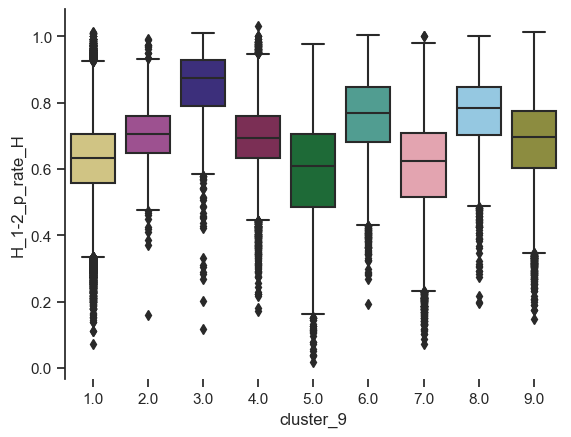

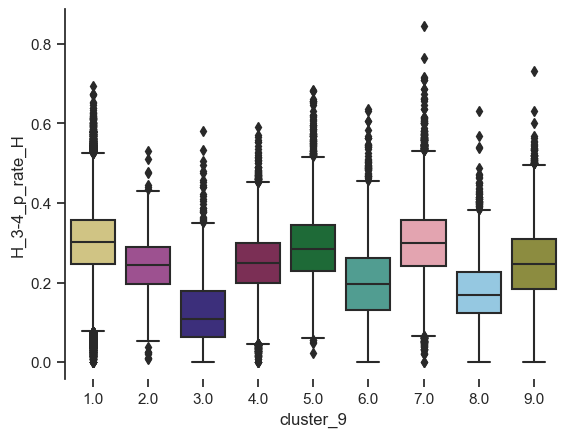

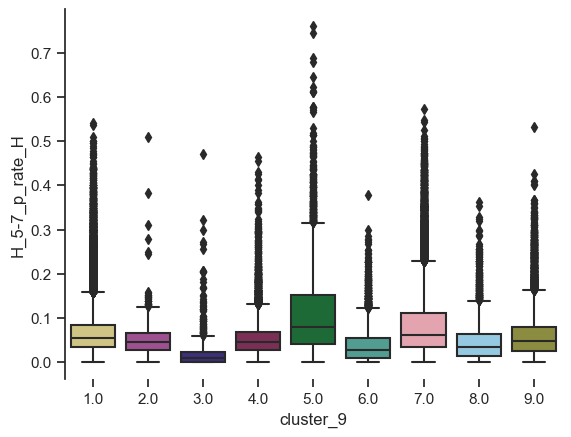

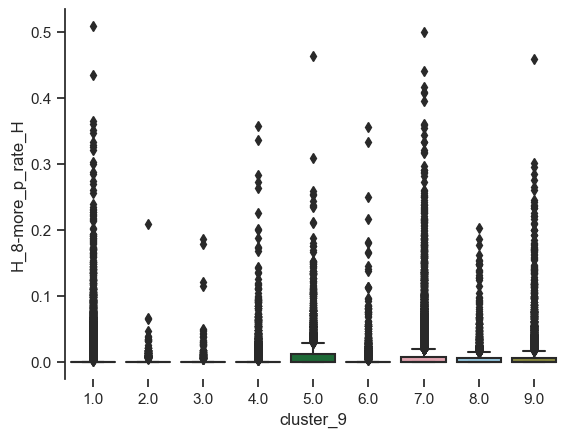

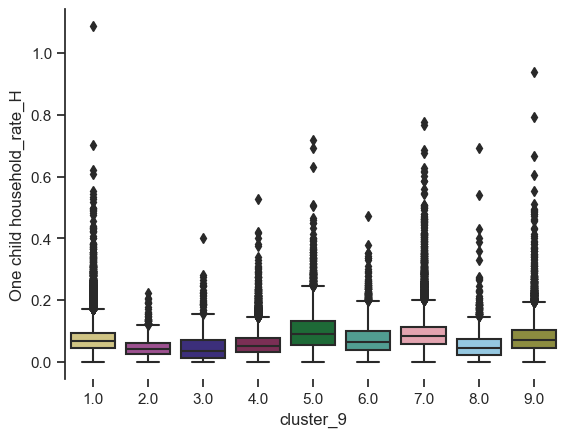

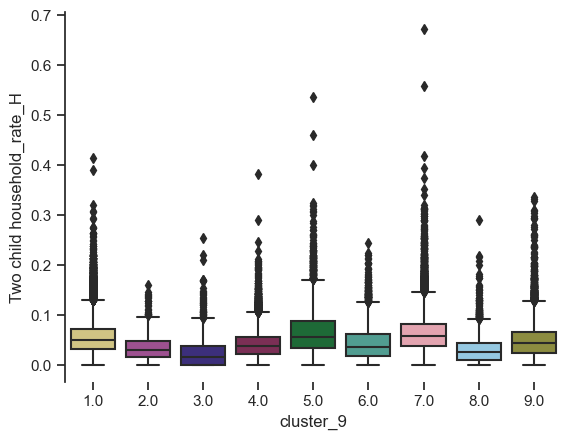

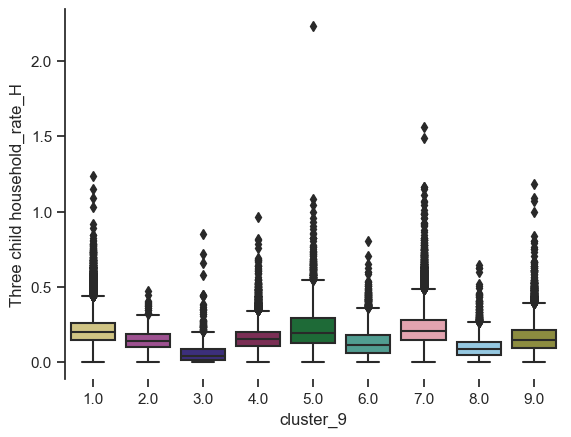

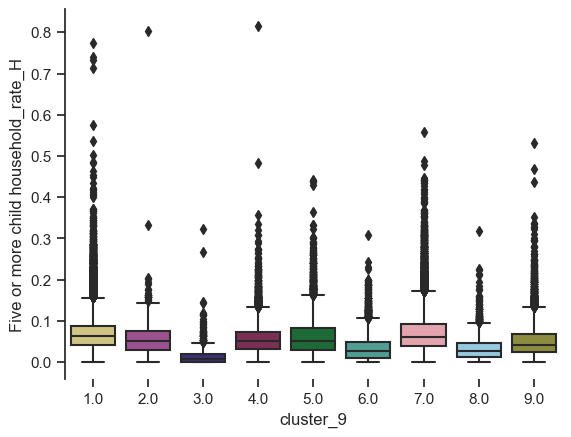

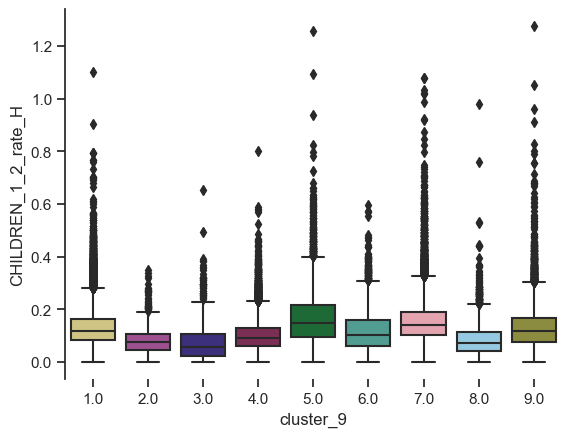

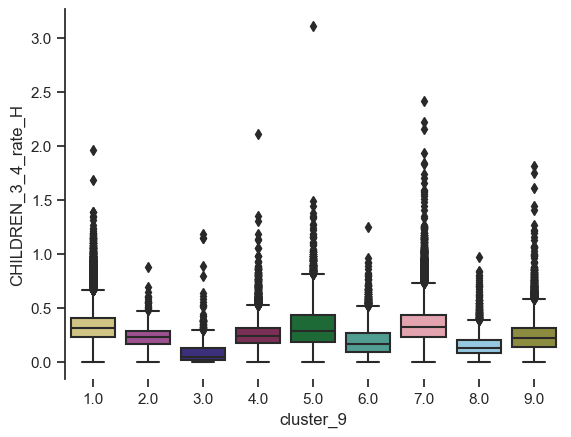

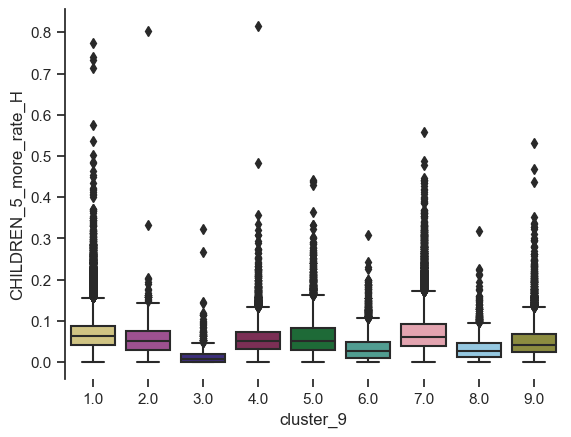

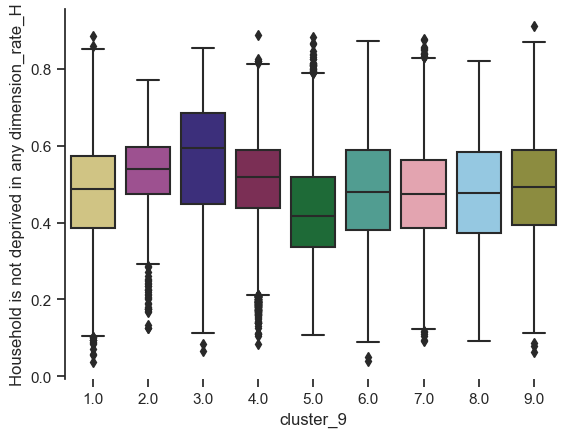

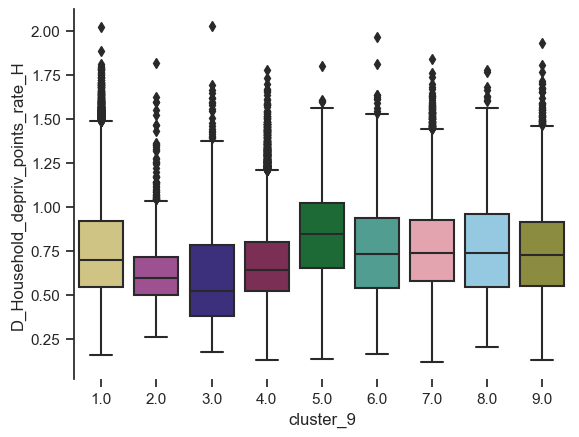

In [52]:
for i in list2:
    sns.boxplot(x=data['cluster_9'],y=data[i],palette=color_list)
    plt.show()

In [53]:
!jupyter nbconvert 0105_colating_data_for_clusters_copy.ipynb --to markdown --NbConvertApp.output_files_dir=.

[NbConvertApp] Converting notebook 0105_colating_data_for_clusters_copy.ipynb to markdown
[NbConvertApp] Support files will be in ./
[NbConvertApp] Writing 46641 bytes to 0105_colating_data_for_clusters_copy.md
